In [1]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from util import*
from tensorflow.keras import layers, Model


In [2]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [3]:
# Specify the path to download data
download_path = os.getcwd() + "/dataset/"
print(download_path)

/Users/zhenglyu/Desktop/Research/course/cme216/course_project/cme-216-housing-pricing-prediction/dataset/


In [4]:
ds = download_skl_dataset(download_path)

In [5]:
data, target, feature_names, DESCR = data_process(ds)

In [6]:
data_norm, std_data, mean_data = feature_normalization(data, log_flag=True)

In [7]:
# Split data to training, validation and testset
x_train, y_train, x_val, y_val, x_test, y_test = train_set_prepare(data_norm, target, random_state=100)

In [8]:
# Create the model class
model = nn_model(data, target)

# Build model
# neuron_list = [256, 256, 128, 128, 64, 32, 16, 8, 4]
neuron_list = [128, 128, 128, 128, 64, 32, 16, 8, 4]
model.build_model(neuron_list, reg_factor=5e-5)

# Compile model
model.compile_model(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
                    loss = tf.keras.losses.MeanAbsolutePercentageError(),
                    metrics = [tf.keras.metrics.MeanAbsolutePercentageError(), 'mse'])

In [9]:
# Specify the checkpoint path
cur_path = os.getcwd()
ckpt_path = cur_path + '/checkpoint/log_mape/network_log.ckpt'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=ckpt_path,
    save_weights_only=True,
    monitor='val_mean_absolute_percentage_error',
    mode='min',
    save_best_only=True)

In [10]:
# Training only. SKIP THIS WHEN LOADING MODEL
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Train the model
model.train(x_train, y_train, x_val, y_val, batch_size=10, epochs=30, callbacks=[lr_scheduler, model_checkpoint_callback])

Train on 13209 samples, validate on 3303 samples
Epoch 1/30
13209/13209 [==============================] - 3s 225us/sample - loss: 27.2402 - mean_absolute_percentage_error: 27.1763 - mse: 0.8271 - val_loss: 21.9702 - val_mean_absolute_percentage_error: 21.9059 - val_mse: 0.5832
Epoch 2/30
13209/13209 [==============================] - 2s 188us/sample - loss: 22.0865 - mean_absolute_percentage_error: 22.0215 - mse: 0.5048 - val_loss: 21.0176 - val_mean_absolute_percentage_error: 20.9519 - val_mse: 0.4504
Epoch 3/30
13209/13209 [==============================] - 2s 179us/sample - loss: 21.3639 - mean_absolute_percentage_error: 21.2972 - mse: 0.4701 - val_loss: 21.3272 - val_mean_absolute_percentage_error: 21.2594 - val_mse: 0.5136
Epoch 4/30
13209/13209 [==============================] - 2s 171us/sample - loss: 18.6270 - mean_absolute_percentage_error: 18.5591 - mse: 0.3910 - val_loss: 18.4666 - val_mean_absolute_percentage_error: 18.3987 - val_mse: 0.3995
Epoch 5/30
13209/13209 [=======

In [11]:
# Load model
model.load(ckpt_path)

In [12]:
y_pred = model.test(x_test, y_test)

In [13]:
mse = np.mean(((y_pred.T - y_test)**2))
print(mse)

0.28941778984280514


## Visualize the result

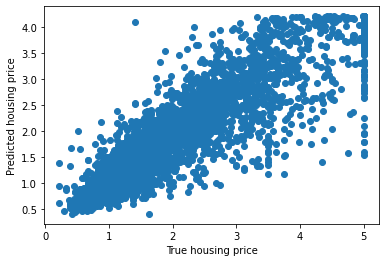

In [14]:
plot_pred_true(x_test, y_test, y_pred)

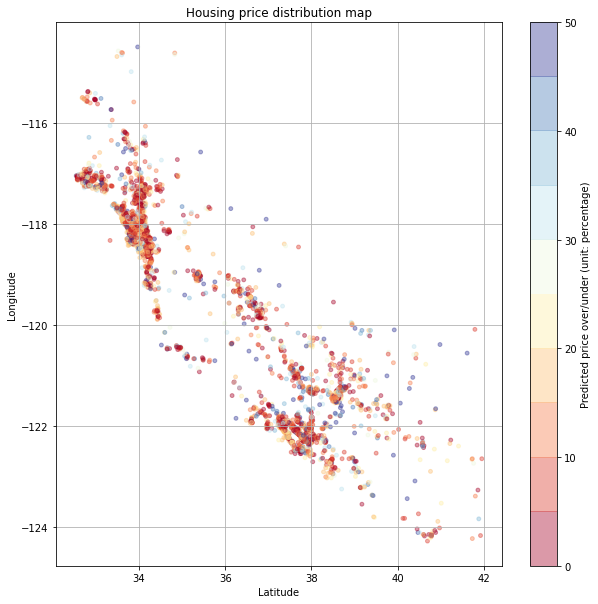

In [21]:
# Plot land map
save_path = cur_path + '/figures/network_log_data_train_mape_test_mape.png'
land_map(x_test*std_data + mean_data, np.abs(y_pred.T - y_test)/y_test*100, save_path=save_path, bar_label='Predicted price over/under (unit: percentage)', clim=[0, 50], step=10)

In [16]:
tmp = np.mean(np.abs((y_pred.T - y_test)/y_test*100))
print(tmp)

16.6914726704577
